In [1]:
%pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 850.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 3.1 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 44.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13

In [2]:
import pickle
import pandas as pd
import numpy as np
import random
from pycaret.regression import *

In [ ]:
# data = pd.read_csv("p4ds_data.csv")
# data

,A00_SEX,A01_AGE,A01_SMAM,A01_PACKYR,DMDRUG,A01_OBDIG1,A01_OBDIG2,A01_WEIGHT,BMI,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR,GLU_1h,GLU_2h
0,0.0,53.0,0.0,3.5,0,28.0,0.91,71.2,25.226757,6.4,107.0,254.0,164.0,147.0,57.0
1,0.0,47.0,8.0,8.0,0,15.9,0.83,59.9,21.047313,5.4,82.0,155.0,84.0,73.0,2.0
2,1.0,43.0,0.0,0.0,0,33.8,0.90,67.0,26.369274,5.6,86.0,187.0,110.0,101.0,24.0
3,1.0,62.0,0.0,0.0,0,33.1,0.94,57.0,25.778220,5.5,83.0,177.0,139.0,94.0,56.0
4,1.0,41.0,40.0,40.0,0,34.2,0.89,64.0,27.056231,6.2,91.0,189.0,168.0,98.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,1.0,62.0,10.0,15.0,0,27.3,0.89,52.0,21.926126,5.8,87.0,122.0,146.0,35.0,59.0
6933,1.0,60.0,0.0,0.0,0,26.7,0.89,59.0,25.040053,5.4,77.0,83.0,92.0,6.0,15.0
6934,1.0,62.0,0.0,0.0,0,39.5,0.96,60.0,26.666667,5.9,82.0,183.0,156.0,101.0,74.0
6935,1.0,65.0,0.0,0.0,0,33.6,0.95,66.5,27.255841,6.4,86.0,207.0,141.0,121.0,55.0


In [ ]:
# print(data.columns)

Index(['A00_SEX', 'A01_AGE', 'A01_SMAM', 'A01_PACKYR', 'DMDRUG', 'A01_OBDIG1',
       'A01_OBDIG2', 'A01_WEIGHT', 'BMI', 'A01_HBA1C', 'A01_GLU0_TR',
       'A01_GLU60_TR', 'A01_GLU120_TR', 'GLU_1h', 'GLU_2h'],
      dtype='object')


In [18]:
# import user info

# user_data = pd.read_csv("data/userinfo.csv")
# user_data

,user_id,A00_SEX,A01_AGE,A01_SMAM,A01_PACKYR,DMDRUG,A01_OBDIG1,A01_OBDIG2,A01_WEIGHT,BMI,A01_HBA1C,A01_GLU0_TR
0,user1,1,31,0.0,0.0,0,22.5,0.833333,55.0,20.202020,5.4,90.0
1,user2,0,36,10.0,10.0,1,20.1,0.842105,75.0,23.148148,7.2,120.5
2,user3,0,49,20.0,25.0,0,25.3,0.850000,80.0,26.122449,6.1,110.0
3,user4,0,25,5.0,2.5,0,18.7,0.795455,68.0,23.529412,5.8,100.0
4,user5,1,21,0.0,0.0,0,23.5,0.792683,50.0,19.531250,5.2,85.0


In [1]:
# ! pip install streamlit

In [3]:
# import streamlit as st
# if st.session_state.current_user:
#     cur_user = st.session_state.current_user

2024-06-05 11:24:33.247 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`


AttributeError: st.session_state has no attribute "current_user". Did you forget to initialize it? More info: https://docs.streamlit.io/library/advanced-features/session-state#initialization

In [17]:

# if user_data['A01_HBA1C'] == None:
#     if (user_data['A01_GLU0_TR'] >= 126):
#         user_data['A01_HBA1C'] = random.uniform(6.5, 10.0)
#     elif ((user_data['A01_GLU0_TR'] < 126) & (user_data['A01_GLU0_TR'] >= 100)):
#         user_data['A01_HBA1C'] = random.uniform(5.8, 6.4)
#     else:
#         user_data['A01_HBA1C'] = random.uniform(4.0, 5.7)

KeyError: 0

In [4]:
# synthetic user data

# Random seed for reproducibility
np.random.seed(42)

# Number of data points
n = 1

# Generate random data
SEX = np.random.randint(0, 2, size=n)  # 0 for female, 1 for male
AGE = np.round(np.random.randint(40, 70, size=n), 1)  # Age between 20 and 80
SMAM = np.random.randint(0, 40, size=n)  # Cigarettes per day between 0 and 40
YEARS_SMOKED = np.random.randint(0, 60, size=n)  # Years of smoking between 0 and 60
PACKYR = np.round((SMAM * YEARS_SMOKED) / 20, 1)  # Pack years
DMDRUG = np.random.randint(0, 2, size=n)  # Drug use: 1 for yes, 0 for no
OBDIG1 = np.round(np.random.uniform(10, 50, size=n), 1)  # Body fat percentage between 10 and 50
OBDIG2 = np.round(np.random.uniform(0.7, 1.2, size=n), 2)  # Abdominal obesity (waist-to-hip ratio)
WEIGHT = np.round(np.random.uniform(50, 120, size=n), 1)  # Weight in Kg between 50 and 120
HEIGHT = np.round(np.random.uniform(1.5, 2.0, size=n), 2)  # Height in meters between 1.5 and 2.0
BMI = np.round(WEIGHT / (HEIGHT ** 2), 1)  # BMI calculation
HBA1C = np.round(np.random.uniform(4, 10, size=n), 1)  # HbA1c percentage between 4 and 10
GLU = np.round(np.random.uniform(70, 180, size=n), 1)  # Fasting glucose between 70 and 180

# Create a DataFrame
syn_data = pd.DataFrame({
    'A00_SEX': SEX,
    'A01_AGE': AGE,
    'A01_SMAM': SMAM,
    'A01_PACKYR': PACKYR,
    'DMDRUG': DMDRUG,
    'A01_OBDIG1': OBDIG1,
    'A01_OBDIG2': OBDIG2,
    'A01_WEIGHT': WEIGHT,
    'BMI': BMI,
    'A01_HBA1C': HBA1C,
    'A01_GLU0_TR': GLU
})

syn_data


,A00_SEX,A01_AGE,A01_SMAM,A01_PACKYR,DMDRUG,A01_OBDIG1,A01_OBDIG2,A01_WEIGHT,BMI,A01_HBA1C,A01_GLU0_TR
0,0,59,28,19.6,0,41.2,1.0,81.2,33.8,6.8,106.7


In [5]:
with open('glu1h_model.pkl', 'rb') as file:
    glu1h_model = pickle.load(file)

In [6]:
# glu1h_model

GradientBoostingRegressor(random_state=8641)

In [6]:
with open('glu2h_model.pkl', 'rb') as file:
    glu2h_model = pickle.load(file)

In [7]:
glu1 = glu1h_model.predict(syn_data).item()
glu2 = glu2h_model.predict(syn_data).item()

In [8]:
gluf = syn_data['A01_GLU0_TR'].item()   # fasting glucose
glu1h_inc = glu1 - gluf     # 1h increase
glu2h_inc = glu2 - gluf     # 2h increase

drug = syn_data['DMDRUG'].item()
# HbA1c = syn_data['A01_HBA1C'].item()

# print(gluf, glu1h_inc, glu2h_inc, drug)

In [9]:
# sugar intake time and amount

time = [6, 12, 18]

if time[0] == None:
    time[0] = 0
for i in range(1, 3):
    if time[i] == None:
        time[i] = time[i-1]+2

print(time)

[6, 12, 18]


In [10]:
sugar = [25.2, 50.1, 50.3]
sugar = [0 if x is None else x for x in sugar]
print(sugar)

[25.2, 50.1, 50.3]


In [11]:
# prediction


result = [0]*24

if ((gluf >= 126) & (drug == 0)): # case diabetes
  for i in range(0, time[0]+1): # 0-6: fasting glucose
    result[i] = gluf
  result[time[0]+1] = gluf + glu1h_inc * (sugar[0] / 50) # 7 : 1h
  result[time[0]+2] = gluf + glu2h_inc * (sugar[0] / 50) # 8 : 2h
  for i in range(time[0]+3, time[1]+1): # 9 - 12
    result[i] = np.maximum((result[time[0]+2] - (result[time[0]+2] - gluf)*(i-(time[0]+2)) / 5), gluf)
  result[time[1]+1] = result[time[1]] + glu1h_inc * (sugar[1] / 50)
  result[time[1]+2] = result[time[1]] + glu2h_inc * (sugar[1] / 50)
  for i in range(time[1]+1, time[2]+1):
    result[i] = np.maximum((result[time[1]+2] - (result[time[0]+2] - gluf)*(i-(time[1]+2)) / 5), gluf)
  result[time[2]+1] = result[time[2]] + glu1h_inc * (sugar[2] / 50)
  result[time[2]+2] = result[time[2]] + glu2h_inc * (sugar[2] / 50)
  for i in range(time[2]+1, 24):
    result[i] = np.maximum((result[time[2]+2] - (result[time[0]+2] - gluf)*(i-(time[2]+2)) / 5), gluf)
    
else:  # case not diabetes
  for i in range(0, time[0]+1): # 0-6: fasting glucose
    result[i] = gluf
  result[time[0]+1] = gluf + glu1h_inc * (sugar[0] / 50) # 7 : 1h
  result[time[0]+2] = gluf + glu2h_inc * (sugar[0] / 50) # 8 : 2h
  for i in range(time[0]+3, time[1]+1): # 9 - 12
    result[i] = np.maximum((result[time[0]+2] - (result[time[0]+2] - gluf)*(i-(time[0]+2)) / 2), gluf)
  result[time[1]+1] = result[time[1]] + glu1h_inc * (sugar[1] / 50)
  result[time[1]+2] = result[time[1]] + glu2h_inc * (sugar[1] / 50)
  for i in range(time[1]+1, time[2]+1):
    result[i] = np.maximum((result[time[1]+2] - (result[time[0]+2] - gluf)*(i-(time[1]+2)) / 2), gluf)
  result[time[2]+1] = result[time[2]] + glu1h_inc * (sugar[2] / 50)
  result[time[2]+2] = result[time[2]] + glu2h_inc * (sugar[2] / 50)
  for i in range(time[2]+1, 24):
    result[i] = np.maximum((result[time[2]+2] - (result[time[0]+2] - gluf)*(i-(time[2]+2)) / 2), gluf)
  

In [12]:
result # blood sugar 24 hr

[106.7,
 106.7,
 106.7,
 106.7,
 106.7,
 106.7,
 106.7,
 176.07291138596275,
 153.1718620321254,
 129.9359310160627,
 106.7,
 106.7,
 106.7,
 222.32641862755008,
 199.0904876114874,
 175.8545565954247,
 152.618625579362,
 129.38269456329928,
 106.7,
 222.69524292939235,
 199.45931191332966,
 176.22338089726696,
 152.98744988120427,
 129.75151886514155]

In [10]:
# df = pd.DataFrame(result).transpose()
# df.columns = [f'Index_{i}' for i in df.columns]
# df

,Index_0,Index_1,Index_2,Index_3,Index_4,Index_5,Index_6,Index_7,Index_8,Index_9,...,Index_14,Index_15,Index_16,Index_17,Index_18,Index_19,Index_20,Index_21,Index_22,Index_23
0,106.7,106.7,106.7,106.7,106.7,106.7,106.7,244.344665,198.906075,198.906075,...,494.849535,494.849535,365.466356,426.445952,362.496762,362.496762,533.027937,447.762349,362.496762,277.231175


In [13]:
import matplotlib.pyplot as plt


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

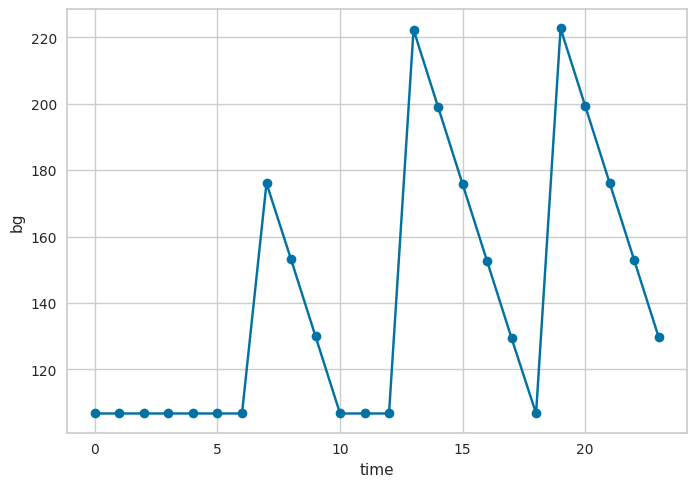

In [14]:

plt.plot(range(len(result)), result, marker='o')

plt.xlabel('time')
plt.ylabel('bg')

plt.grid(True)
plt.show()